### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from datasets import load_dataset
from sklearn.model_selection import train_test_split

### Variables

In [ ]:
TOTAL_NUMBER_INSTANCES = 250_000
TEST_SIZE = 0.2 # ratio of the instances to split for test set between 0 and 1
SUBSET_NAME = "top4-balanced" # "original" for the full dataset

### Importing and Processing Data

In [2]:
data_name = "contemmcm/ag_news"

dataset = load_dataset(data_name, SUBSET_NAME, split='complete')
dataset.shape

(472164, 10)

In [3]:
dataset.column_names

['source',
 'url',
 'title',
 'image',
 'category',
 'description',
 'rank',
 'pubdate',
 'text',
 'label']

In [4]:
dataset = dataset.select_columns(['title', 'category', 'label'])

In [5]:
dataset.column_names

['title', 'category', 'label']

In [6]:
df = dataset.to_pandas()

In [7]:
df["title"].str.len().describe()

count    472163.000000
mean         43.263858
std          14.718188
min           1.000000
25%          33.000000
50%          43.000000
75%          50.000000
max        1939.000000
Name: title, dtype: float64

In [8]:
# Split data into training and validation sets
df, _ = train_test_split(df, train_size=TOTAL_NUMBER_INSTANCES, shuffle=True, stratify=df["label"])
df.shape

(250000, 3)

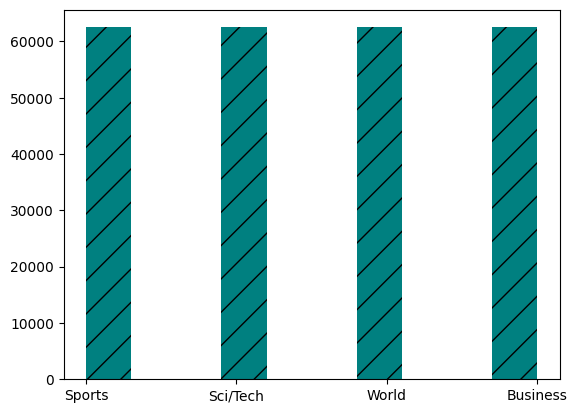

In [9]:
ax = df["category"].hist(grid=False, hatch="/", color="teal")
plt.show()

In [10]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, shuffle=True, stratify=df["label"])
train_df.shape, test_df.shape

((200000, 3), (50000, 3))

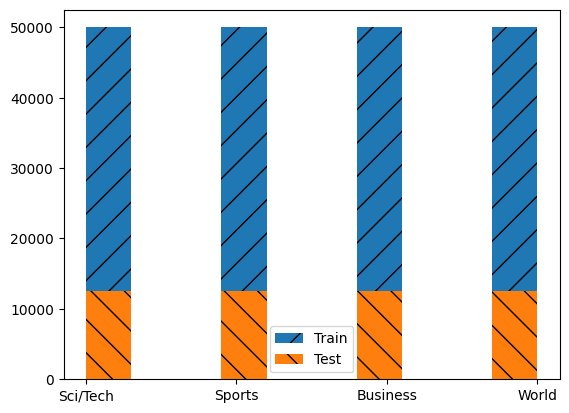

In [11]:
ax = train_df["category"].hist(grid=False, hatch="/")
ax.hist(test_df["category"], hatch="\\")
plt.legend(labels=["Train","Test"])
plt.show()

In [12]:
for t in train_df.sample(3).values:
    print(t[1],":")
    print(t[0])
    print("-"*30)

Sci/Tech :
Medis Tech misses chance to market power pack
------------------------------
Sports :
Swiss sack gold medal rider
------------------------------
Sports :
Pats accused of spying on Jets' signals 
    (AP)

------------------------------


In [14]:
data_dir = Path().cwd() / "data"
data_dir.mkdir(exist_ok=True)

train_df.to_csv( data_dir / "train.csv", index=False)
test_df.to_csv( data_dir / "test.csv", index=False)